#### Import lib

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#### Đọc dữ liệu

In [58]:
df = pd.read_csv('../Data/processed_data.csv')
df.head(5)

,Brand,Name,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,OS,VRAM,Price_VND
0,HP,HP Chromebook 11A-NA0002MU,MediaTek Octa-core,MediaTek,0,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64,0,45.0,Google Chrome,0,6897000
1,Lenovo,Lenovo Ideapad Slim 3,AMD Hexa-Core Ryzen 5,AMD,12,8,DDR4 RAM,4.0,LCD,15.6,Integrated Graphics,AMD,512,0,65.0,Windows 11,0,10886700
2,Dell,Dell G15-5520,Intel Core i5 (12th Gen),Intel,32,16,DDR5 RAM,3.3,LCD,15.6,GeForce RTX 3050,NVIDIA,512,0,56.0,Windows 11,4,23550000
3,HP,HP 15s-fy5007TU,Intel Core i5 (12th Gen),Intel,8,8,DDR4 RAM,4.2,LCD,15.6,Integrated Graphics,Intel,512,0,65.0,Windows 11,0,16647000
4,Infinix,Infinix Inbook Y2 Plus XL29,Intel Core i3 (11th Gen),Intel,0,8,LPDDR4X RAM,1.7,LCD,15.6,Integrated Graphics,Intel,512,0,45.0,Windows 11,0,6597000


In [59]:
# Liệt kê các cột
df.columns

Index(['Brand', 'Name', 'Processor_Name', 'Processor_Brand', 'RAM_Expandable',
       'RAM', 'RAM_TYPE', 'Ghz', 'Display_type', 'Display', 'GPU', 'GPU_Brand',
       'SSD', 'HDD', 'Adapter', 'OS', 'VRAM', 'Price_VND'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            3916 non-null   object 
 1   Name             3916 non-null   object 
 2   Processor_Name   3916 non-null   object 
 3   Processor_Brand  3916 non-null   object 
 4   RAM_Expandable   3916 non-null   int64  
 5   RAM              3916 non-null   int64  
 6   RAM_TYPE         3916 non-null   object 
 7   Ghz              3916 non-null   float64
 8   Display_type     3916 non-null   object 
 9   Display          3916 non-null   float64
 10  GPU              3916 non-null   object 
 11  GPU_Brand        3916 non-null   object 
 12  SSD              3916 non-null   int64  
 13  HDD              3916 non-null   int64  
 14  Adapter          3916 non-null   float64
 15  OS               3916 non-null   object 
 16  VRAM             3916 non-null   int64  
 17  Price_VND     

In [61]:
# Tạo danh sách biến số và biến phân loại
categorical_columns = ['Brand','Name','Processor_Name','Processor_Brand','RAM_TYPE','Display_type','GPU','GPU_Brand','OS',]
numeric_columns = ['RAM_Expandable','RAM','Ghz','Display','SSD','HDD','Adapter','VRAM','Price_VND']
target = 'Price_VND'

#### Phân tích thăm dò các biến

##### Về giá bán

Phân phối giá bán

In [62]:
# Thống kê mô tả cho giá bán
df['Price_VND'].describe()

count    3.916000e+03
mean     2.152115e+07
std      1.541365e+07
min      2.397000e+06
25%      1.190122e+07
50%      1.764450e+07
75%      2.519700e+07
max      1.511670e+08
Name: Price_VND, dtype: float64

Kết quả thống kê mô tả cho thấy:
- Tổng quan:
    - Số lượng giá trị: có 3916 sản phẩm được thống kê.
    - Giá trị nhỏ nhất (min): giá thấp nhất là 2.397.000 VND, cho thấy có những sản phẩm thuộc phân khúc giá rẻ, có thể là các dòng laptop cấu hình thấp hoặc là laptop mini như là tablet lai laptop.
    - Giá trị lớn nhất (max): Giá cao nhất là 151.167.000 VND, có thể là các sản phẩm cao cấp như MacBook Pro hoặc dòng laptop gaming.
- Giá trung bình và độ phân tán:
    - Trung bình (mean): Giá trung bình là 21.521.150 VND, tương đối cao. Tuy nhiên, giá trị này có thể bị kéo lên bởi các sản phẩm cao cấp với giá rất cao.
    - Độ lệch chuẩn (std): Độ lệch chuẩn là 15.413.650 VND, khá lớn, cho thấy giá bán trải rộng trên một dải rộng từ phân khúc giá rẻ đến cao cấp.
- Phân bố giá bán: 
    - 25% (Q1): 25% sản phẩm có giá dưới 11.901.220 VND, đây là phân khúc giá rẻ.
    - 50% (Median): Giá trung vị là 17.644.500 VND, cho thấy một nửa sản phẩm có giá dưới mức này, và phân khúc trung bình là phổ biến.
    - 75% (Q3): 25% sản phẩm có giá cao hơn 25.197.000 VND, đây là phân khúc cao cấp.
    - Khoảng giá từ Q1 tới Q3: IQR = Q3 - Q1 = 25.197.000 - 11.901.220 = 13.295.780 VND, thể hiện mức độ trải rộng của giá trong khoảng trung bình.
- Giá trị ngoại lai: Giá trị lớn nhất (max) vượt xa Q3, kết hợp với độ lệch chuẩn lớn, cho thấy khả năng tồn tại các giá trị ngoại lai (outliers) ở phân khúc giá rất cao.

Nhận định chung: 
- Phân khúc thị trường:
    - Giá bán trải dài từ phân khúc giá rẻ (~2.4 triệu) đến cao cấp (>150 triệu).
    - Khoảng giá từ Q1 đến Q3 (11.9 - 25.2 triệu) chiếm phần lớn, là phân khúc phổ biến.
- Mức giá trung bình: 
    - Trung bình giá (21.5 triệu) cao hơn trung vị (17.6 triệu), cho thấy dữ liệu bị lệch phải do có những sản phẩm giá cao.
- Xu hướng:
    - Dữ liệu phản ánh sự đa dạng trong phân khúc sản phẩm, từ laptop bình dân đến cao cấp, phù hợp với nhiều nhu cầu người dùng.    

Phân loại giá bán:
- Dưới 10 triệu: Phân khúc giá thấp.
- Từ 10 - 20 triệu: Phân khúc giá trung bình thấp.
- Từ 20 - 30 triệu: Phân khúc giá trung bình cao.
- Từ 30 - 50 triệu: Phân khúc giá cao.
- Trên 50 triệu: Phân khúc giá rất cao.

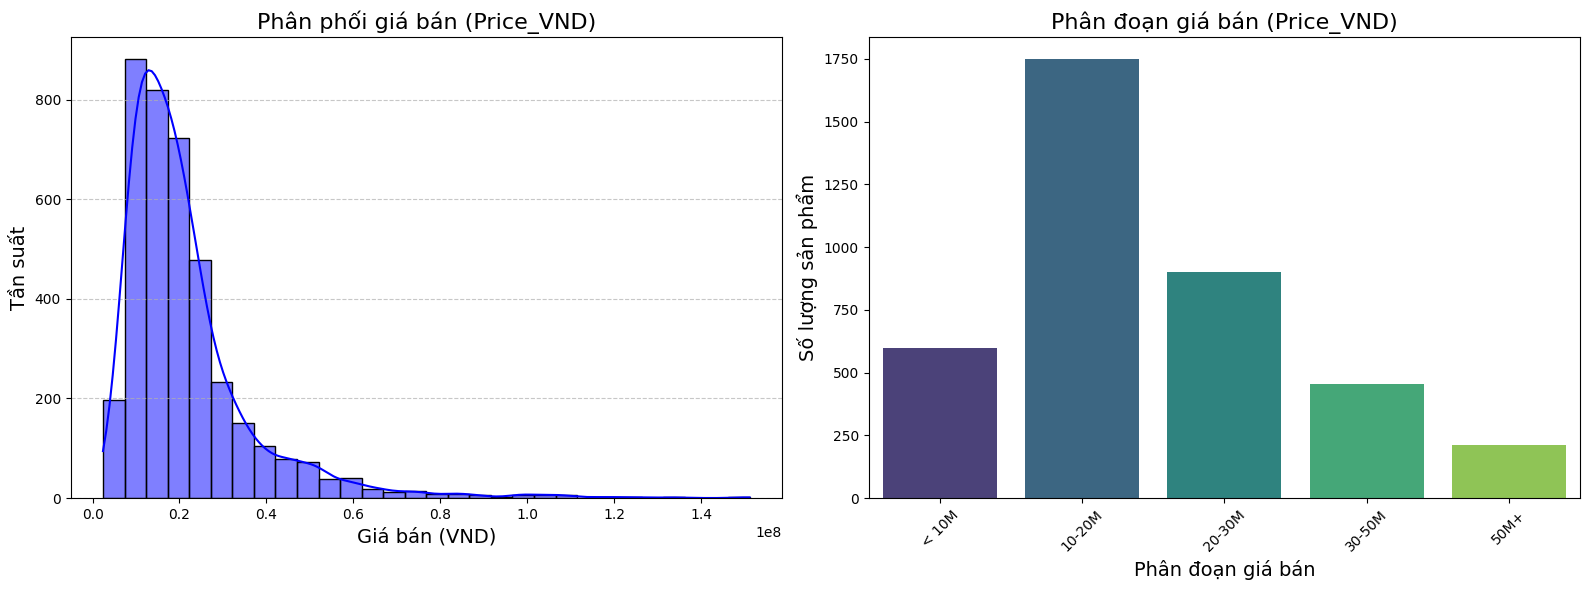

In [63]:
# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Tạo 2 biểu đồ cạnh nhau

# Biểu đồ 1: Histogram (Phân phối giá bán)
sns.histplot(df['Price_VND'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Phân phối giá bán (Price_VND)', fontsize=16)
axes[0].set_xlabel('Giá bán (VND)', fontsize=14)
axes[0].set_ylabel('Tần suất', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Tạo các phân đoạn giá bán
bins = [0, 10_000_000, 20_000_000, 30_000_000, 50_000_000, df['Price_VND'].max()]
labels = ['< 10M', '10-20M', '20-30M', '30-50M', '50M+']
df['Price_Category'] = pd.cut(df['Price_VND'], bins=bins, labels=labels, right=False)

# Đếm số lượng sản phẩm trong mỗi phân đoạn
price_range_distribution = df['Price_Category'].value_counts().sort_index()

# Biểu đồ 2: Bar chart (Phân đoạn giá bán)
sns.barplot(x=price_range_distribution.index, y=price_range_distribution.values, hue=price_range_distribution.index, palette='viridis', ax=axes[1])
axes[1].set_title('Phân đoạn giá bán (Price_VND)', fontsize=16)
axes[1].set_xlabel('Phân đoạn giá bán', fontsize=14)
axes[1].set_ylabel('Số lượng sản phẩm', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Hiển thị cả 2 biểu đồ
plt.tight_layout()  # Điều chỉnh khoảng cách giữa các biểu đồ
plt.show()

##### Phân tích biến số

Thống kê các số liệu cơ bản

In [64]:
df[numeric_columns].describe()

,RAM_Expandable,RAM,Ghz,Display,SSD,HDD,Adapter,VRAM,Price_VND
count,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3916.000000,3.916000e+03
mean,10.972932,11.127681,2.749030,15.071757,472.646067,247.108274,77.418795,1.782431,2.152115e+07
std,15.702804,6.337187,1.106044,1.029230,333.059615,446.458854,50.079868,2.744768,1.541365e+07
min,0.000000,2.000000,0.800000,10.100000,64.000000,0.000000,15.000000,0.000000,2.397000e+06
25%,0.000000,8.000000,2.000000,14.000000,256.000000,0.000000,60.000000,0.000000,1.190122e+07
50%,0.000000,8.000000,2.500000,15.600000,512.000000,0.000000,65.000000,0.000000,1.764450e+07
75%,16.000000,16.000000,3.400000,15.600000,512.000000,0.000000,65.000000,4.000000,2.519700e+07
max,64.000000,64.000000,5.500000,18.000000,4098.000000,2048.000000,330.000000,16.000000,1.511670e+08


Phân tích phân phối/khoảng giá trị của các biến số

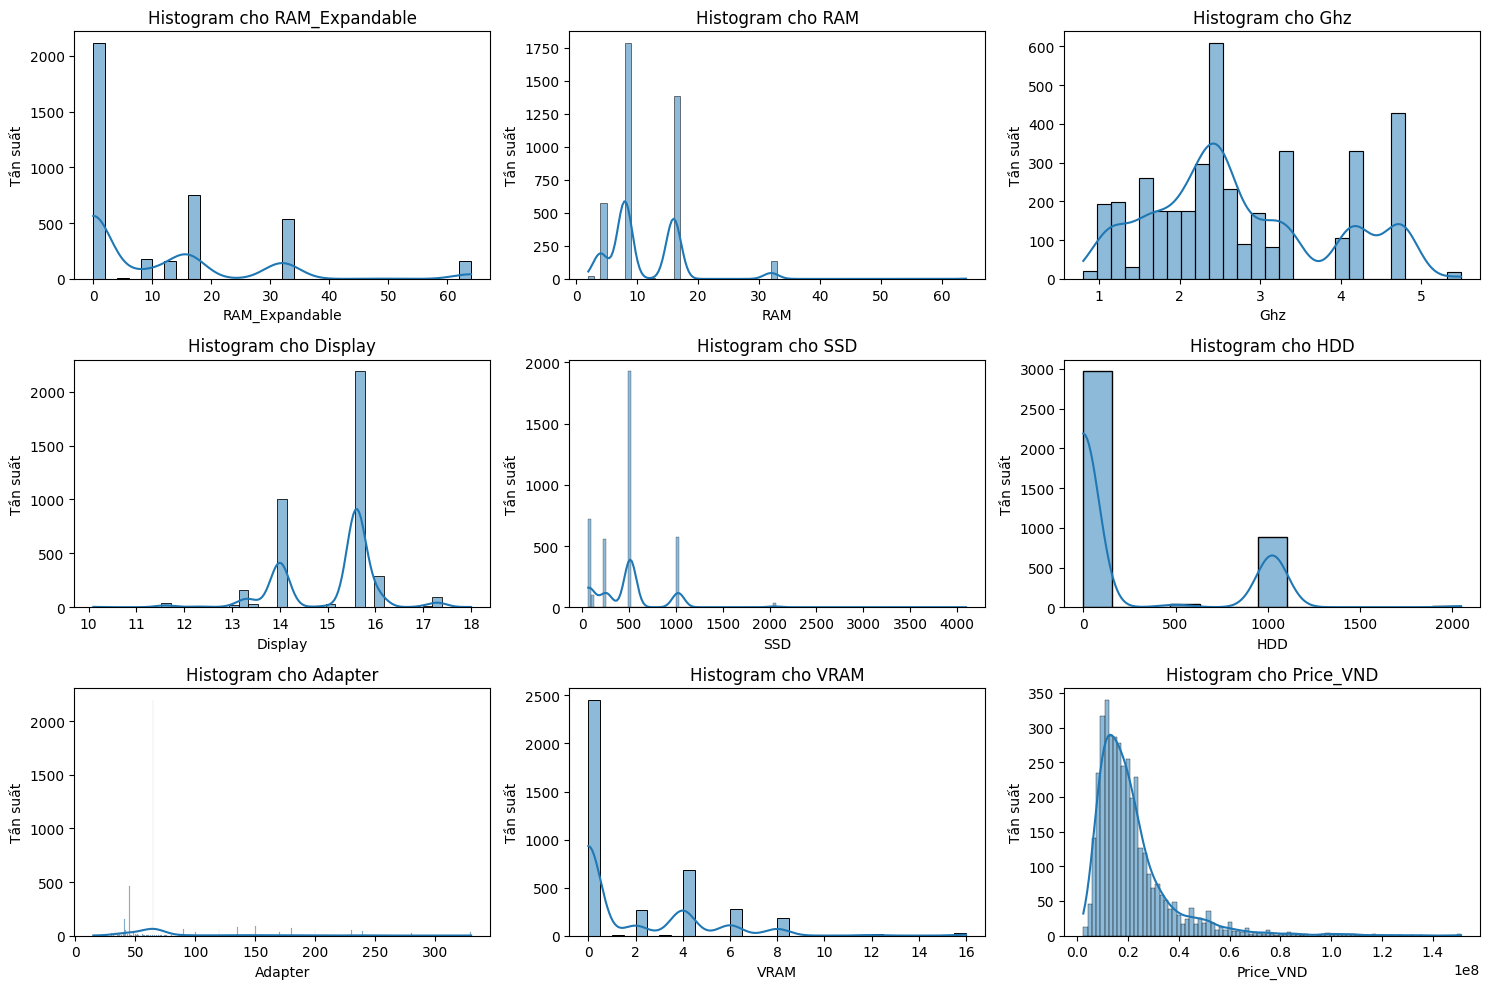

In [65]:
# Vẽ biểu đồ phân phối của các biến số
# Thiết lập kích thước biểu đồ dựa trên số lượng biến số.
plt.figure(figsize=(15, 10))
    
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram cho {col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')

# Chỉnh layout để tránh chồng lấn.
plt.tight_layout()

# Hiển thị biểu đồ.
plt.show()

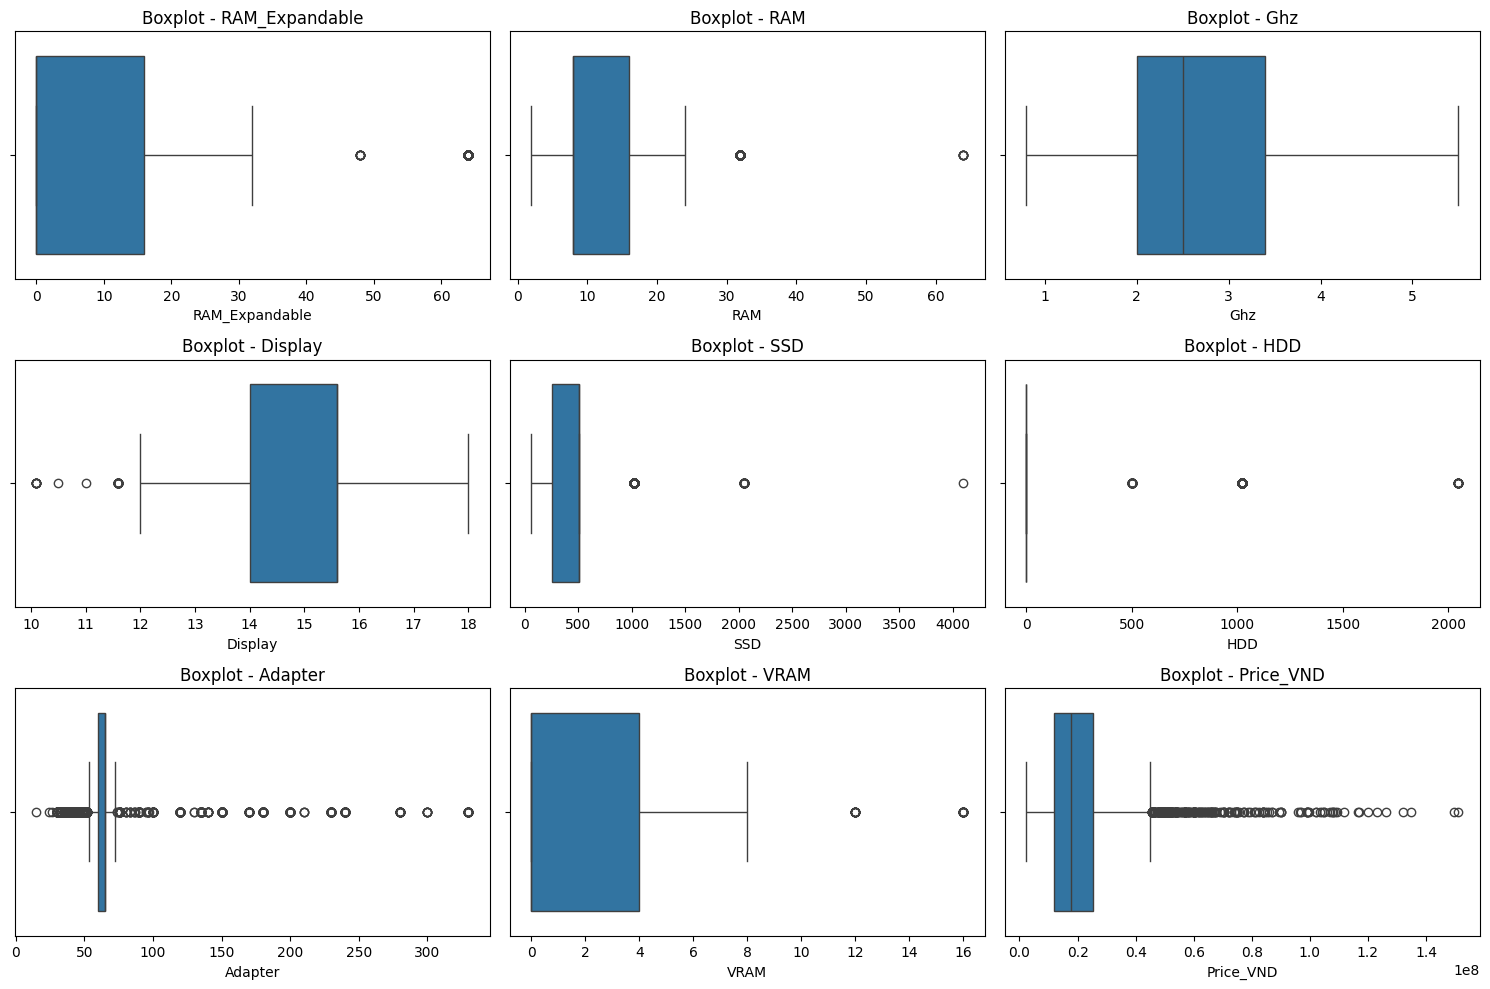

In [66]:
# Thiết lập kích thước biểu đồ dựa trên số lượng biến số.
plt.figure(figsize=(15, 10))

# Vòng lặp để vẽ boxplot cho từng biến số.
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')

# Chỉnh layout để tránh chồng lấn.
plt.tight_layout()

# Hiển thị biểu đồ.
plt.show()

**Phân tích chi tiết dữ liệu**

**1. RAM_Expandable**
- **Phân tích**:
  - Giá trị trung bình khá thấp (10.97 GB), nhưng độ lệch chuẩn lớn (15.70) cho thấy sự phân tán mạnh. Phần lớn thiết bị không hỗ trợ mở rộng RAM (50% giá trị là 0 GB), phù hợp với các mẫu laptop giá rẻ hoặc tầm trung.
  - Các thiết bị có khả năng mở rộng lớn hơn (16 GB đến 64 GB) thường là máy cao cấp hoặc workstation.
- **Đánh giá**:
  - Biến này cho thấy xu hướng thị trường: các thiết bị cao cấp vẫn giữ khả năng mở rộng RAM, nhưng phần lớn người dùng phổ thông có thể hài lòng với RAM cố định.
  - Các giá trị rất cao (64 GB) có thể là các giá trị ngoại lai.

**2. RAM**
- **Phân tích**:
  - Trung bình 11.13 GB cho thấy các thiết bị trong bộ dữ liệu chủ yếu thuộc phân khúc tầm trung, với 50% thiết bị có RAM ≤ 8 GB.
  - 25% thiết bị có RAM > 16 GB, thường dành cho người dùng chuyên nghiệp (lập trình, đồ họa, gaming).
- **Đánh giá**:
  - Phù hợp với xu hướng thị trường, nơi 8 GB là tiêu chuẩn phổ biến cho laptop thông thường, trong khi các thiết bị cao cấp cung cấp 16 GB hoặc hơn.
  - Sự chênh lệch RAM giữa các thiết bị có thể ảnh hưởng lớn đến giá cả (biến Price_VND), tạo điều kiện nghiên cứu thêm mối quan hệ giữa RAM và giá.

**3. Ghz**
- **Phân tích**:
  - Trung bình 2.75 GHz, tập trung ở khoảng 2.0–3.4 GHz. Phần lớn thiết bị có tần số xử lý thuộc phân khúc phổ thông, phù hợp với vi xử lý như Intel Core i5 hoặc i7.
  - Một số giá trị rất thấp (0.8 GHz) hoặc rất cao (>5 GHz) có thể là máy sử dụng công nghệ đặc thù, chẳng hạn ARM-based hoặc overclocking.
- **Đánh giá**:
  - Biến này là chỉ số quan trọng về hiệu năng, nhưng cần kiểm tra các giá trị cực trị để đảm bảo không có dữ liệu sai lệch.
  - Ghz thấp (<1 GHz) có thể phù hợp với laptop tiết kiệm năng lượng hoặc Chromebook.

**4. Display**
- **Phân tích**:
  - Trung bình 15.07 inch, với phần lớn tập trung ở 15.6 inch (50% giá trị). Đây là kích thước phổ biến cho các laptop đa năng.
  - Các giá trị lớn hơn (18 inch) là outlier, có thể là máy trạm hoặc thiết bị đặc thù như màn hình cảm ứng lớn.
- **Đánh giá**:
  - Phân phối này cho thấy thị trường vẫn ưu tiên kích thước màn hình tiêu chuẩn (14-15.6 inch) để cân bằng giữa trải nghiệm người dùng và tính di động.
  - Display lớn (>17 inch) thường phục vụ cho các nhóm khách hàng chuyên biệt, ví dụ, gaming hoặc thiết kế đồ họa.

**5. SSD**
- **Phân tích**:
  - Trung bình 472.65 GB cho thấy thị trường đã chuyển dịch mạnh sang SSD, thay thế HDD truyền thống.
  - 50% thiết bị có SSD từ 256 GB đến 512 GB, đáp ứng tốt nhu cầu lưu trữ cơ bản và tốc độ truy cập cao.
  - Một số giá trị cao (4 TB) có thể là outlier hoặc thiết bị chuyên dụng.
- **Đánh giá**:
  - Các thiết bị có SSD lớn (>1 TB) thường nằm trong phân khúc cao cấp và có giá trị cao. Điều này gợi ý mối tương quan mạnh giữa SSD và giá (Price_VND).
  - Phân phối SSD cho thấy xu hướng tiêu chuẩn hóa dung lượng 256 GB–512 GB.

**6. HDD**
- **Phân tích**:
  - 75% thiết bị không sử dụng HDD, phù hợp với xu hướng thị trường hiện nay chuyển sang SSD.
  - Một số giá trị lớn (2 TB) cho thấy các thiết bị này vẫn phục vụ nhóm khách hàng cần lưu trữ lớn (server mini hoặc gaming PC).
- **Đánh giá**:
  - HDD ngày càng trở nên ít phổ biến trong các thiết bị cá nhân. Giá trị này có thể loại bỏ khi nghiên cứu thị trường hiện đại.

**7. Adapter**
- **Phân tích**:
  - Trung bình 77.42 W, tập trung quanh 65 W. Đây là mức phổ biến với laptop thông thường.
  - Giá trị cao (>200 W) có thể là các laptop gaming hoặc máy trạm có GPU mạnh.
- **Đánh giá**:
  - Biến này cho thấy rõ sự khác biệt giữa các phân khúc thiết bị: adapter càng lớn, hiệu năng thiết bị càng cao nhưng tiêu thụ năng lượng cũng tăng.

**8. VRAM**
- **Phân tích**:
  - Trung bình 1.78 GB, với 50% thiết bị không có VRAM riêng, phù hợp với laptop phổ thông sử dụng GPU tích hợp.
  - Các giá trị cao (16 GB) là đặc trưng của laptop gaming hoặc workstation.
- **Đánh giá**:
  - VRAM đóng vai trò quan trọng trong việc phân biệt thiết bị cao cấp (gaming, đồ họa) với thiết bị phổ thông.
  - Việc nghiên cứu mối tương quan giữa VRAM và giá có thể giúp phân tích sâu hơn về phân khúc khách hàng.

**9. Price_VND**
- **Phân tích**:
  - Trung bình 21.52 triệu VNĐ, nhưng độ lệch chuẩn cao (15.41 triệu VNĐ) cho thấy sự phân tán lớn giữa các thiết bị.
  - 50% giá trị nằm dưới 17.64 triệu VNĐ, cho thấy thị trường chủ yếu tập trung vào phân khúc tầm trung.
  - Các giá trị rất cao (>100 triệu VNĐ) là thiết bị cao cấp hoặc outlier.
- **Đánh giá**:
  - Giá cả bị ảnh hưởng bởi nhiều yếu tố như RAM, SSD, VRAM và Display. Phân tích hồi quy có thể giúp xác định trọng số của từng biến đối với giá.



Đánh giá tự ảnh hưởng của các biến số thông qua mức độ tương quan

In [67]:
# Tính hệ số tương quan giữa các biến số với giá bán, sắp xếp tăng dần
correlation_matrix = df[numeric_columns].corr()
correlation_with_price = correlation_matrix['Price_VND'].sort_values(ascending=False)
correlation_with_price

Price_VND         1.000000
RAM               0.753178
SSD               0.699655
VRAM              0.671522
Adapter           0.456021
Ghz               0.292927
RAM_Expandable    0.263805
Display           0.173674
HDD              -0.240817
Name: Price_VND, dtype: float64

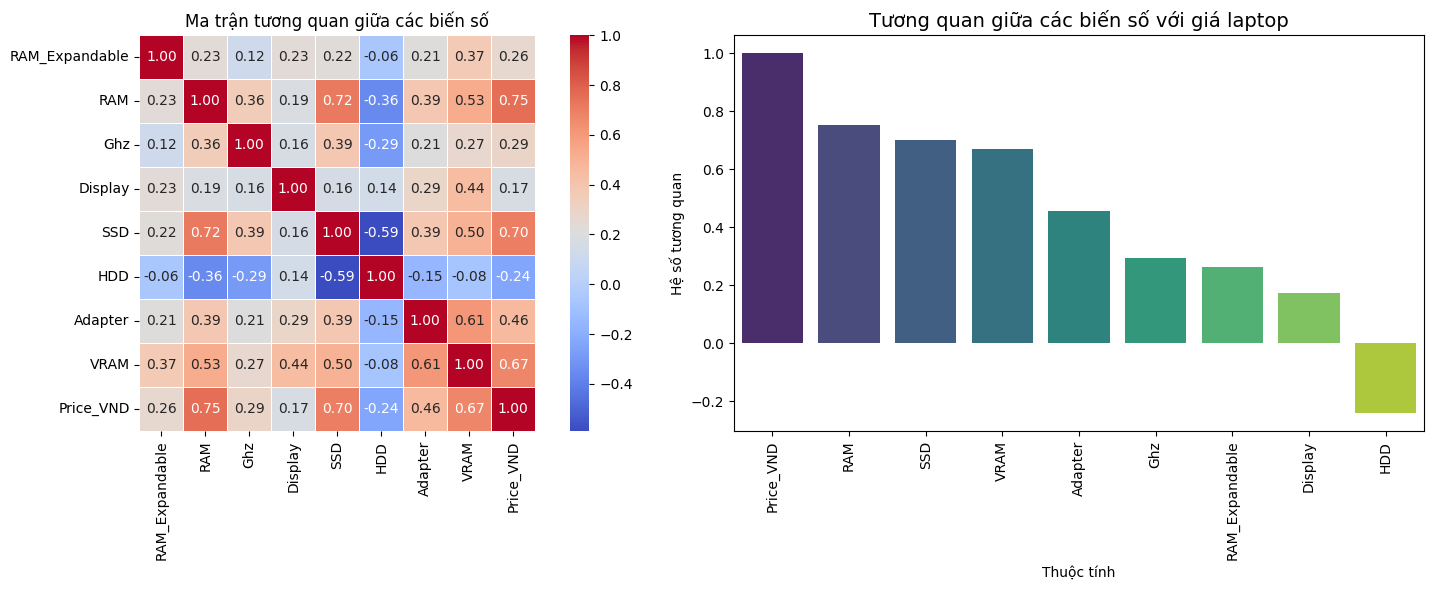

In [68]:
# Tạo một canvas với 2 biểu đồ ngang
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vẽ heatmap ở ô đầu tiên
sns.heatmap(
    correlation_matrix,        # Ma trận tương quan
    annot=True,                # Hiển thị giá trị trên các ô
    cmap="coolwarm",           # Bảng màu (có thể thử 'viridis', 'magma', ...)
    fmt=".2f",                 # Định dạng số (2 chữ số thập phân)
    linewidths=0.5,            # Độ dày đường phân cách giữa các ô
    square=True,               # Giữ hình vuông
    ax=axes[0]                 # Vẽ vào ô đầu tiên
)
axes[0].set_title("Ma trận tương quan giữa các biến số")  # Tiêu đề heatmap

# Vẽ barplot ở ô thứ hai
sns.barplot(
    x=correlation_with_price.index, 
    y=correlation_with_price.values,
    hue=correlation_with_price.index,
    palette='viridis',
    ax=axes[1]  # Vẽ vào ô thứ hai
)
axes[1].set_title('Tương quan giữa các biến số với giá laptop', fontsize=14)
# axes[1].set_xticklabels(correlation_with_price.index, rotation=90)
axes[1].set_ylabel('Hệ số tương quan')
axes[1].set_xlabel('Thuộc tính')
axes[1].tick_params(axis='x', rotation=90)

# Điều chỉnh layout
plt.tight_layout()
plt.show()

Phân tích ma trận tương quan và ảnh hưởng đến giá laptop

1. Ma trận tương quan giữa các biến số (biểu đồ heatmap bên trái)
- Ma trận tương quan cho thấy mối quan hệ giữa các biến số liên quan đến cấu hình laptop, như RAM, SSD, HDD, VRAM và giá cả (`Price_VND`).
- **Quan sát nổi bật:**
  - `Price_VND` (giá) có tương quan cao với:
    - `RAM` (0.75)
    - `SSD` (0.70)
    - `VRAM` (0.67)
    - Điều này cho thấy các yếu tố trên có ảnh hưởng lớn đến giá laptop.
  - `HDD` có tương quan âm (-0.24) với giá, có thể do HDD đang dần lỗi thời so với SSD.
  - Một số mối tương quan đáng chú ý khác:
    - `RAM` và `SSD` có tương quan cao (0.72), cho thấy máy có RAM cao thường đi kèm với dung lượng SSD lớn.
    - `VRAM` có tương quan đáng kể với `RAM` (0.53) và `SSD` (0.50), cho thấy máy có cấu hình đồ họa cao thường đi kèm với bộ nhớ lớn.

2. Biểu đồ cột về tương quan giữa các biến với giá laptop (bên phải)
- Các biến được sắp xếp theo hệ số tương quan với giá (`Price_VND`):
  - Biến ảnh hưởng lớn nhất là `RAM`, tiếp theo là `SSD`, `VRAM`, và `Adapter`.
  - `HDD` có tương quan thấp nhất, điều này phù hợp với xu hướng chuyển đổi từ HDD sang SSD.
  - Các yếu tố như `Ghz`, `RAM_Expandable`, và `Display` có tương quan trung bình với giá, nhưng không nổi bật.

3. Nhận xét tổng quát
- **RAM**, **SSD**, và **VRAM** là các yếu tố quan trọng ảnh hưởng đến giá laptop, cho thấy các cấu hình liên quan đến hiệu suất và tốc độ xử lý là yếu tố chính định giá.
- **HDD** không còn đóng vai trò quan trọng trong việc định giá, điều này phản ánh xu hướng thị trường chuyển sang sử dụng SSD.
- Một số yếu tố khác liên quan tới khả năng nâng cấp hoặc ngoại hình hầu như không có ảnh hưởng trong quyết định của nhóm người dùng phổ thông.



Đánh giá mối quan hệ giữa các biến số có ảnh hưởng mạnh đến giá và rút ra giá trị

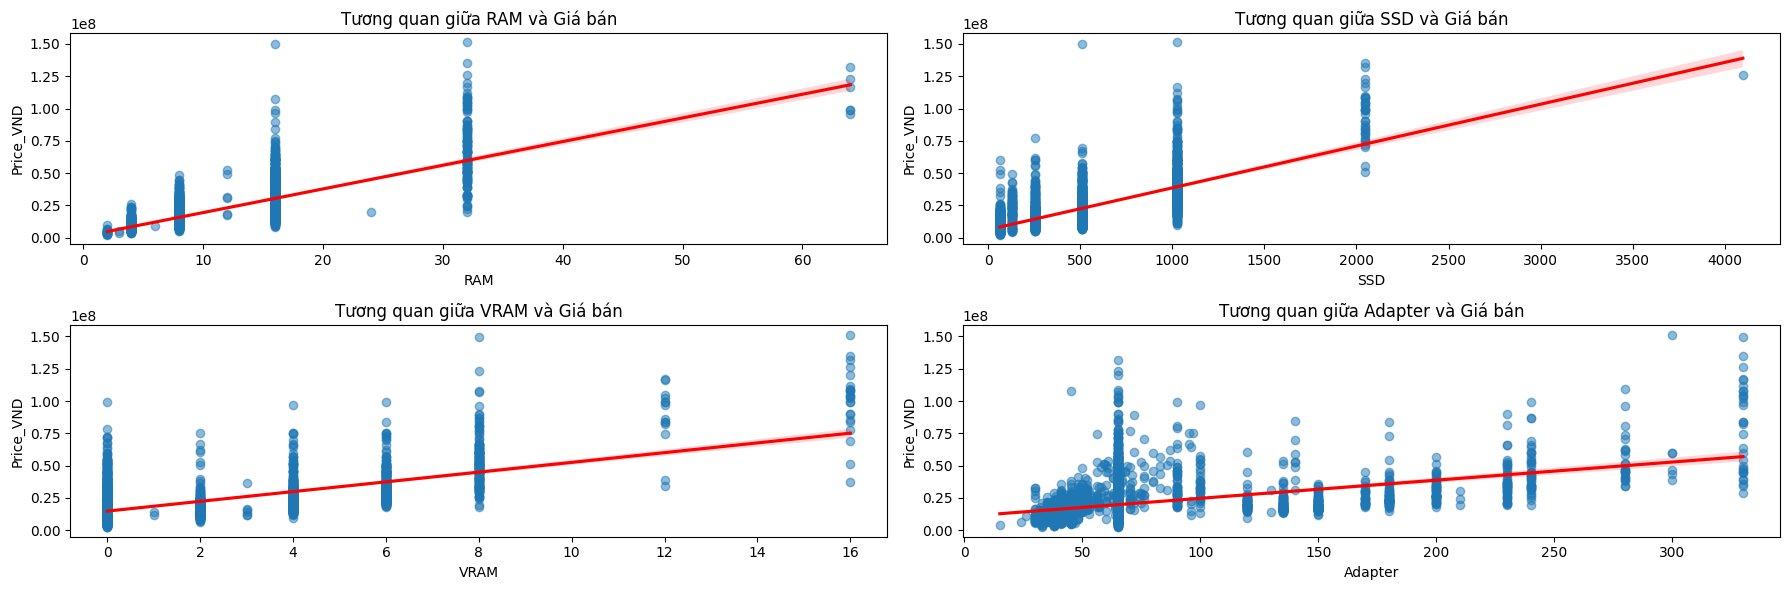

In [69]:
# Vẽ biểu đồ trực quan mối quan hệ tuyến tính giữa các biến có ảnh hưởng mạnh đến giá

# Các biến cần phân tích
strong_factors = ['RAM', 'SSD', 'VRAM', 'Adapter', 'Price_VND'] # Adapter có hệ số tương quan gần 0.5 nên đưa vào để xem ảnh hưởng thế nào

# Tạo biểu đồ regplot
plt.figure(figsize=(18, 6))
for i, factor in enumerate(strong_factors[:-1]):  # Loại bỏ 'Price_VND' vì là biến phụ thuộc
    plt.subplot(2, 2, i + 1)
    sns.regplot(data=df, x=factor, y='Price_VND', 
                scatter_kws={'alpha': 0.5},  # Độ trong suốt của các điểm
                line_kws={'color': 'red'})  # Màu đường hồi quy
    plt.title(f'Tương quan giữa {factor} và Giá bán')
    plt.xlabel(factor)
    plt.ylabel('Price_VND')

plt.tight_layout()  # Sắp xếp các biểu đồ không bị chồng chéo
plt.show()

Phân tích trực quan hóa mối quan hệ giữa các biến và giá bán

1. RAM và Giá bán
- Mối quan hệ tuyến tính rất rõ ràng giữa **RAM** và **giá bán**.
- Khi RAM tăng, giá bán cũng tăng tương ứng.
- Các điểm dữ liệu tập trung thành các cụm, có thể do các mức RAM tiêu chuẩn như **4GB, 8GB, 16GB, 32GB, 64GB**.
- Các sản phẩm có RAM cao (32GB, 64GB) thường thuộc phân khúc cao cấp với giá vượt trội.

2. SSD và Giá bán
- **SSD** cũng có mối quan hệ tuyến tính mạnh với **giá bán**.
- Các máy có dung lượng SSD cao (1000GB, 2000GB) thường thuộc phân khúc giá cao.
- Phân bố dữ liệu cho thấy ảnh hưởng của các mức dung lượng SSD tiêu chuẩn như **256GB, 512GB, 1TB**.

3. VRAM và Giá bán
- Mối quan hệ tuyến tính giữa **VRAM** và **giá bán** tồn tại, nhưng yếu hơn so với RAM và SSD.
- VRAM cao (8GB, 16GB) thường liên quan đến các laptop gaming hoặc đồ họa chuyên nghiệp, có giá bán cao hơn.

4. Adapter và Giá bán
- **Công suất Adapter** cũng có mối quan hệ với **giá bán**, nhưng yếu hơn các yếu tố khác.
- Công suất Adapter lớn (150W, 300W) thường xuất hiện trên các laptop hiệu năng cao, nhưng không phải yếu tố quyết định mạnh đến giá.

Nhận xét chung
1. **Biến quan trọng nhất:** 
   - RAM và SSD là hai yếu tố ảnh hưởng mạnh nhất đến giá bán.
2. **Điểm bất thường:** 
   - Một số sản phẩm có giá bán vượt trội tại các mức RAM hoặc SSD cao. Cần kiểm tra xem đây là lỗi dữ liệu hay sản phẩm đặc biệt.
3. **Tương quan yếu hơn:** 
   - Adapter và VRAM có tác động đến giá bán nhưng không mạnh bằng RAM và SSD.


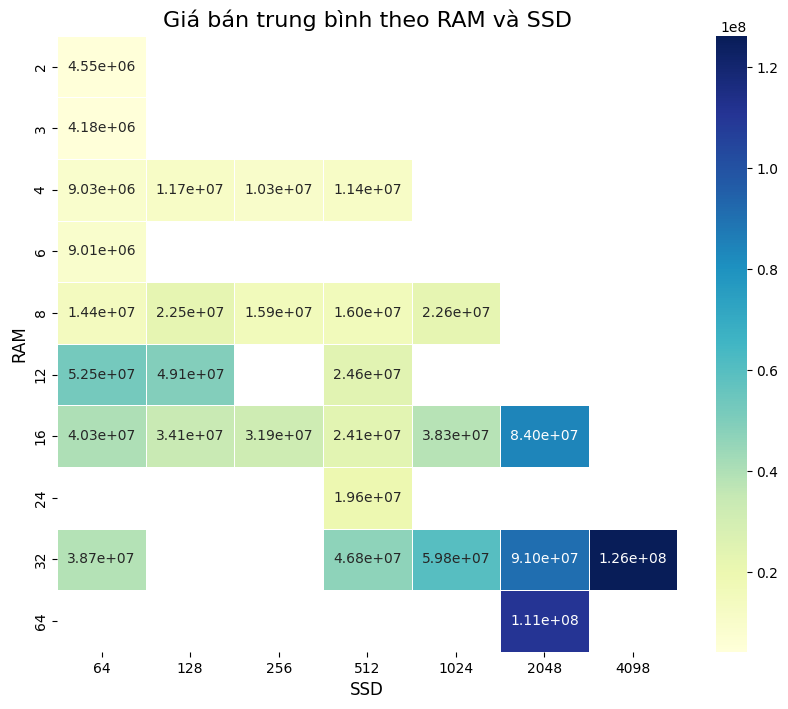

In [70]:
# Tạo một bảng dữ liệu với giá trị trung bình của Price_VND cho mỗi sự kết hợp RAM và SSD
heatmap_data = df.groupby(['RAM', 'SSD'])['Price_VND'].mean().unstack()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2e', linewidths=0.5)
plt.title('Giá bán trung bình theo RAM và SSD', fontsize=16)
plt.xlabel('SSD', fontsize=12)
plt.ylabel('RAM', fontsize=12)
plt.show()

Mối quan hệ giữa RAM và SSD với giá bán là rõ rệt, với các cấu hình RAM lớn và SSD lớn thường đi kèm với giá bán cao hơn.

Như vậy, thông qua các phân tích về biến số, ta có thể tạm kết luận rằng có  3 biến là RAM, SSD, VRAM là có khả năng ảnh hưởng đến giá bán laptop nhiều nhất. Ngoài ra, biến Adapter cũng cần xem xét thêm để đánh giá khả năng ảnh hưởng đến giá bán.

##### Phân tích biến phân loại

Phân phối/tần suất giá trị của các biến phân loại

In [71]:
categorical_columns

['Brand',
 'Name',
 'Processor_Name',
 'Processor_Brand',
 'RAM_TYPE',
 'Display_type',
 'GPU',
 'GPU_Brand',
 'OS']

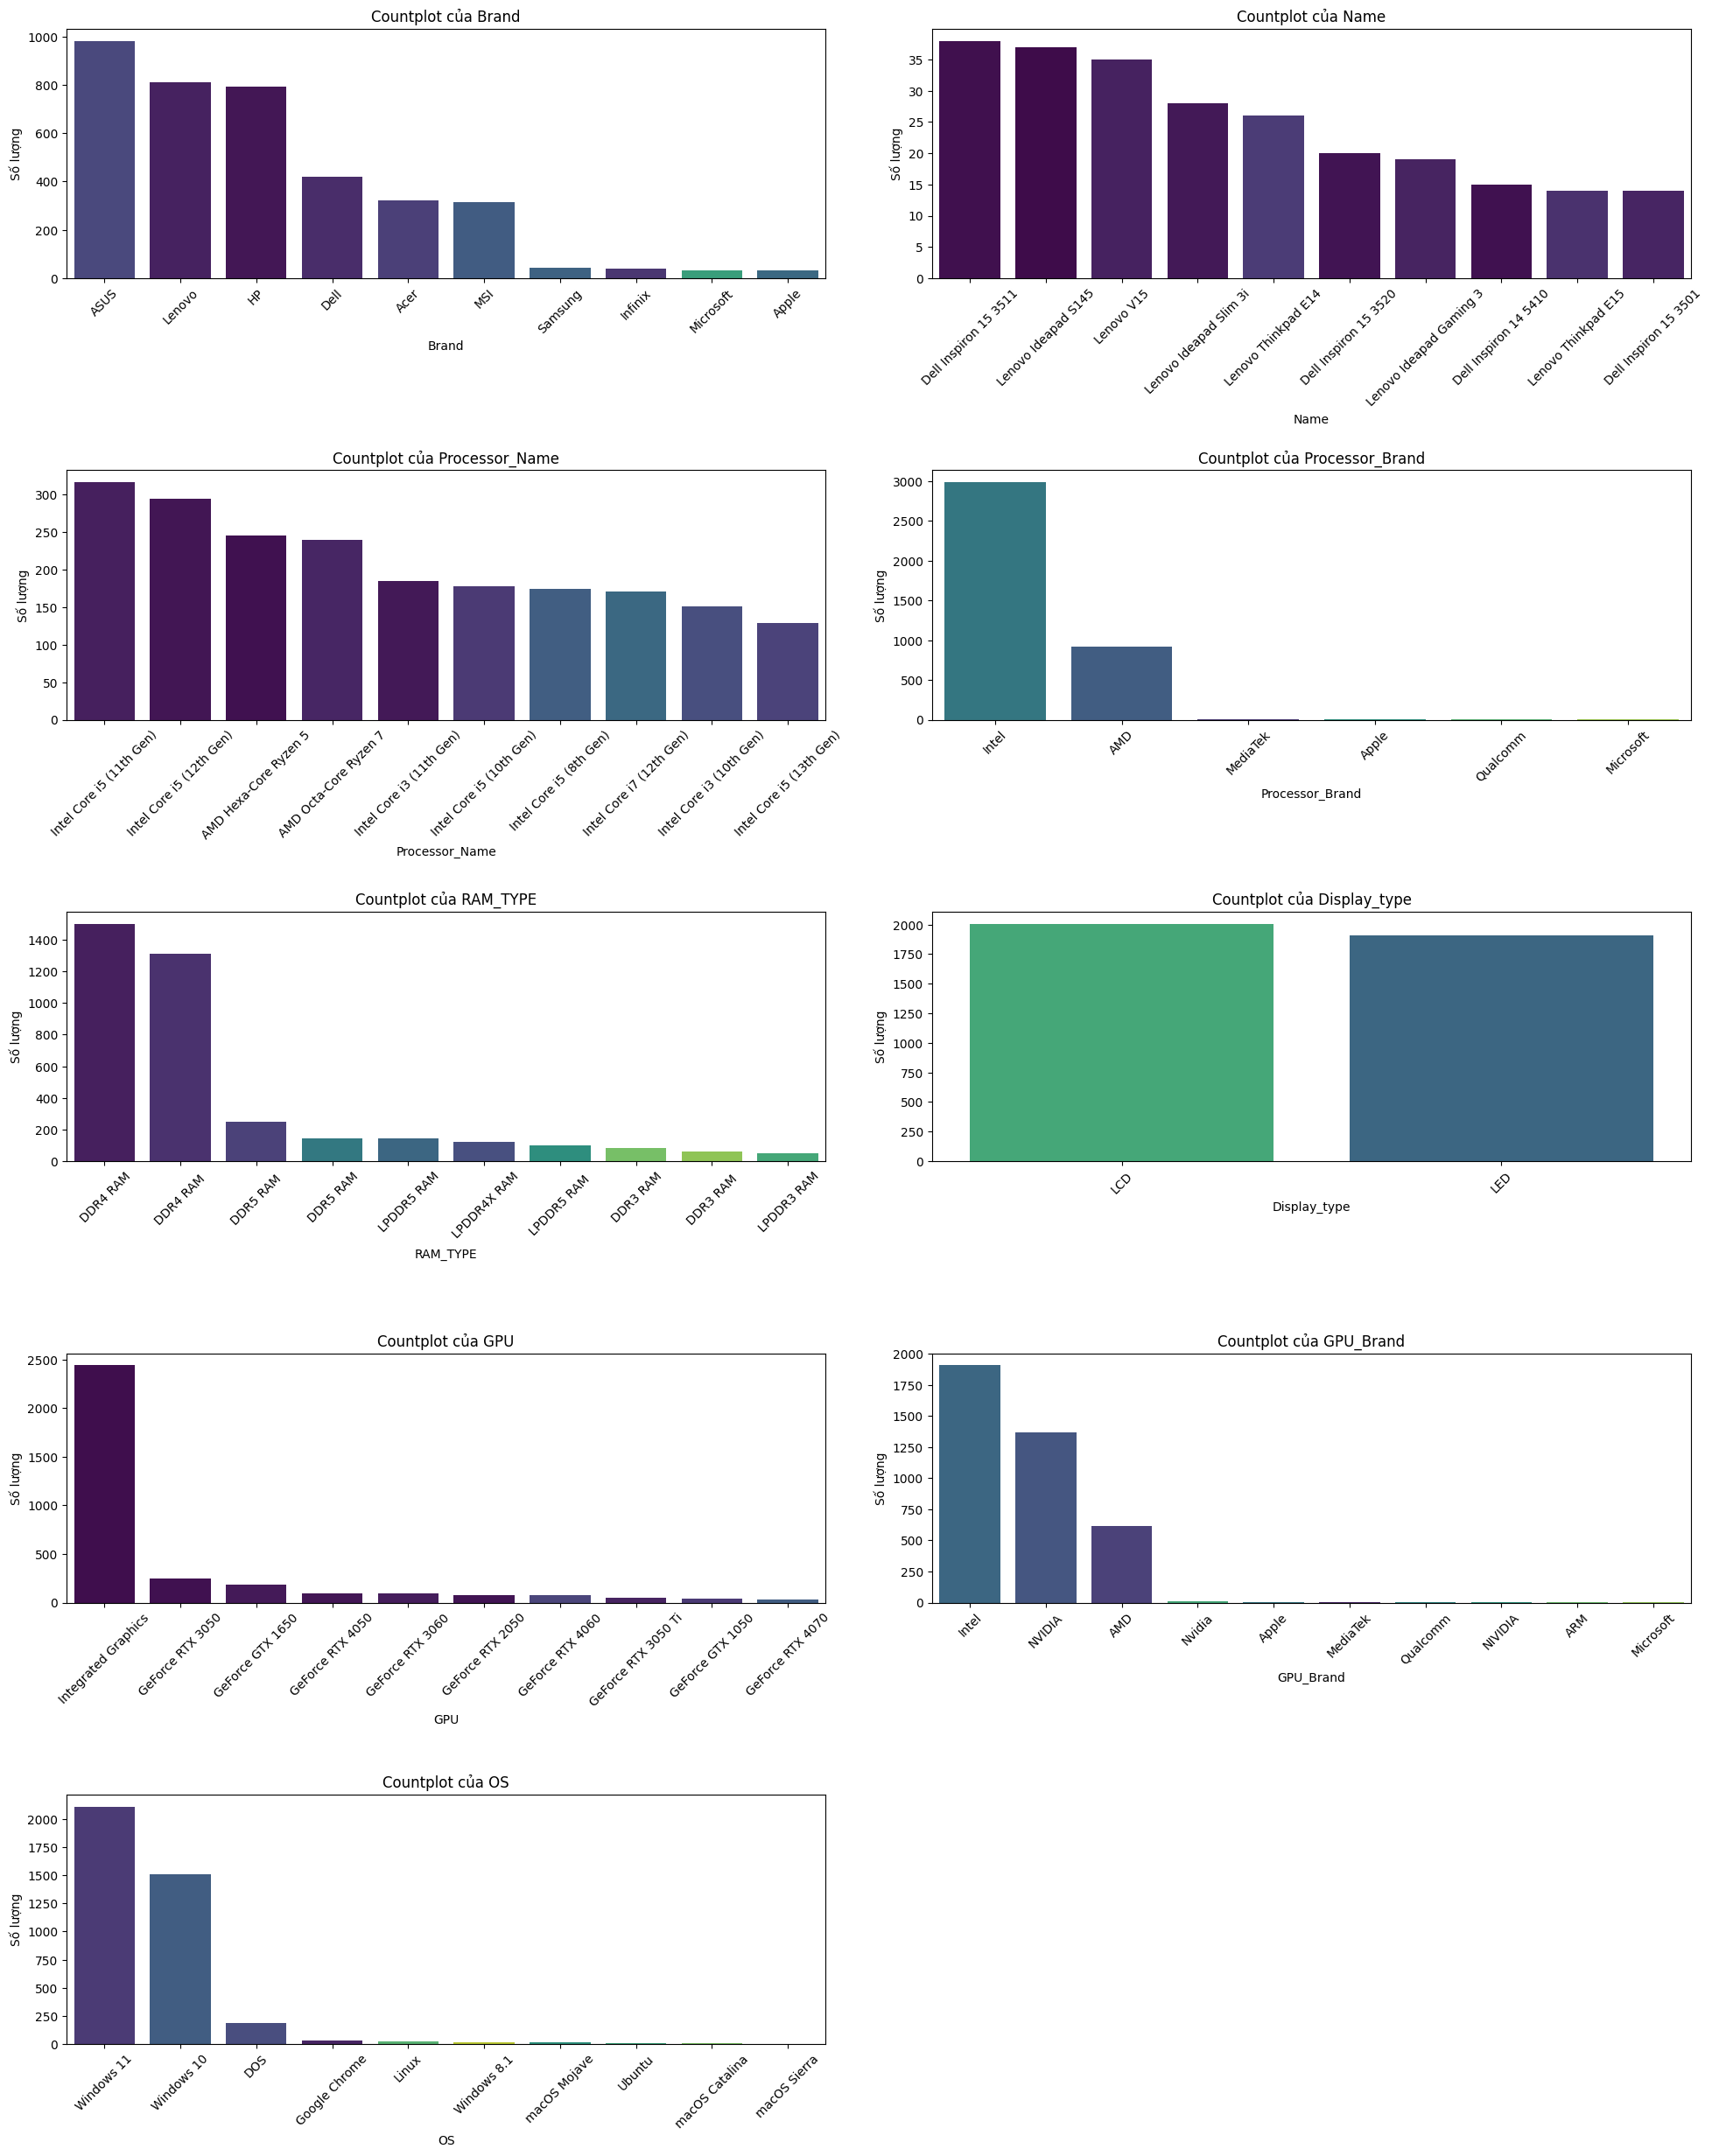

In [72]:
# sử dụng countplot để thể hiện tần suất giá trị của các biến phân loại
# tạo biểu đồ countplot
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)  # Tạo lưới 5x2
    # Nếu một biến có quá nhiều loại, chỉ lấy 10 loại có nhiều giá trị nhất
    top_n = 10
    order = df[col].value_counts().head(top_n).index
    sns.countplot(x=col, data=df, order=order, hue=col, palette="viridis", legend=False)
    plt.title(f'Countplot của {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Số lượng', fontsize=10)
    plt.xticks(rotation=45, fontsize=10)  # Xoay nhãn trục x để dễ đọc

# Tự động căn chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout(pad=2.0)
plt.show()

**Phân tích biểu đồ Countplot**

**1. Phân phối giá trị trong các biến phân loại:**

**Brand (Hãng sản xuất):**
- ASUS, Lenovo, HP, Dell, và Acer chiếm phần lớn số lượng, cho thấy sự phổ biến của các thương hiệu này trên thị trường.
- Các thương hiệu khác như Microsoft và Apple có tần suất thấp hơn.

**Processor_Name (Tên bộ xử lý):**
- Bộ xử lý của Intel chiếm ưu thế, đặc biệt là các dòng Intel Core i5 và i7.
- Điều này phản ánh sự phổ biến của Intel trong thị trường máy tính xách tay.

**Processor_Brand (Thương hiệu bộ xử lý):**
- Intel áp đảo hoàn toàn so với AMD, với số lượng máy tính sử dụng CPU Intel lớn hơn nhiều.

**RAM_TYPE:**
- DDR4 là loại RAM phổ biến nhất, phản ánh tiêu chuẩn công nghệ hiện tại.
- Các loại RAM cũ hơn (DDR3) hoặc ít thông dụng hơn (LPDDR4X) có tần suất thấp hơn.

**GPU (Card đồ họa):**
- Card đồ họa tích hợp (Integrated Graphics) chiếm đa số, cho thấy nhiều máy tính trong dữ liệu hướng đến người dùng phổ thông.
- NVIDIA có mặt với các dòng GPU GeForce nhưng với số lượng ít hơn.

**GPU_Brand (Thương hiệu GPU):**
- Intel và NVIDIA chiếm phần lớn, trong khi AMD có sự hiện diện nhỏ hơn.

**Display_Type (Loại màn hình):**
- LCD và LED là hai loại màn hình chính, với sự cân bằng khá rõ ràng giữa chúng.

**OS (Hệ điều hành):**
- Windows 11 và Windows 10 là hai hệ điều hành phổ biến nhất.
- Các hệ điều hành khác (Linux, macOS) chỉ xuất hiện với tần suất thấp.

**2. Các vấn đề cần lưu ý:**

**Dữ liệu mất cân đối:**
- Một số biến phân loại có sự chênh lệch lớn giữa các giá trị, ví dụ như `Processor_Brand` (Intel so với AMD) và `GPU` (Integrated Graphics so với các GPU khác).
- Điều này có thể gây khó khăn khi xây dựng mô hình nếu cần sự đa dạng.

**Dữ liệu bị tràn nhãn (Overcrowded x-axis):**
- Một số biểu đồ như `GPU` hoặc `Name` có quá nhiều nhãn trên trục x, gây khó khăn trong việc đọc và so sánh.
- Có thể cần giới hạn top N giá trị hoặc gộp các giá trị ít xuất hiện thành một nhóm ("Others").

**3. Hướng xử lý và cải tiến:**

**Tập trung vào top N giá trị:**
- Đối với các biến có quá nhiều giá trị (như `Name`, `GPU`), chỉ hiển thị top 10 giá trị phổ biến nhất hoặc gộp nhóm các giá trị nhỏ lẻ.

**Phân nhóm lại dữ liệu:**
- Với các biến như `Processor_Name`, phân nhóm theo cấp độ hiệu suất (ví dụ: Entry-level, Mid-range, High-end) để biểu đồ dễ hiểu hơn.

**Phân tích thêm theo biến mục tiêu (Price):**
- Dựa trên các phân phối này, có thể kiểm tra xem các nhóm phổ biến (ví dụ: ASUS, Intel Core i5) có mối quan hệ như thế nào với giá để rút ra thông tin hữu ích.




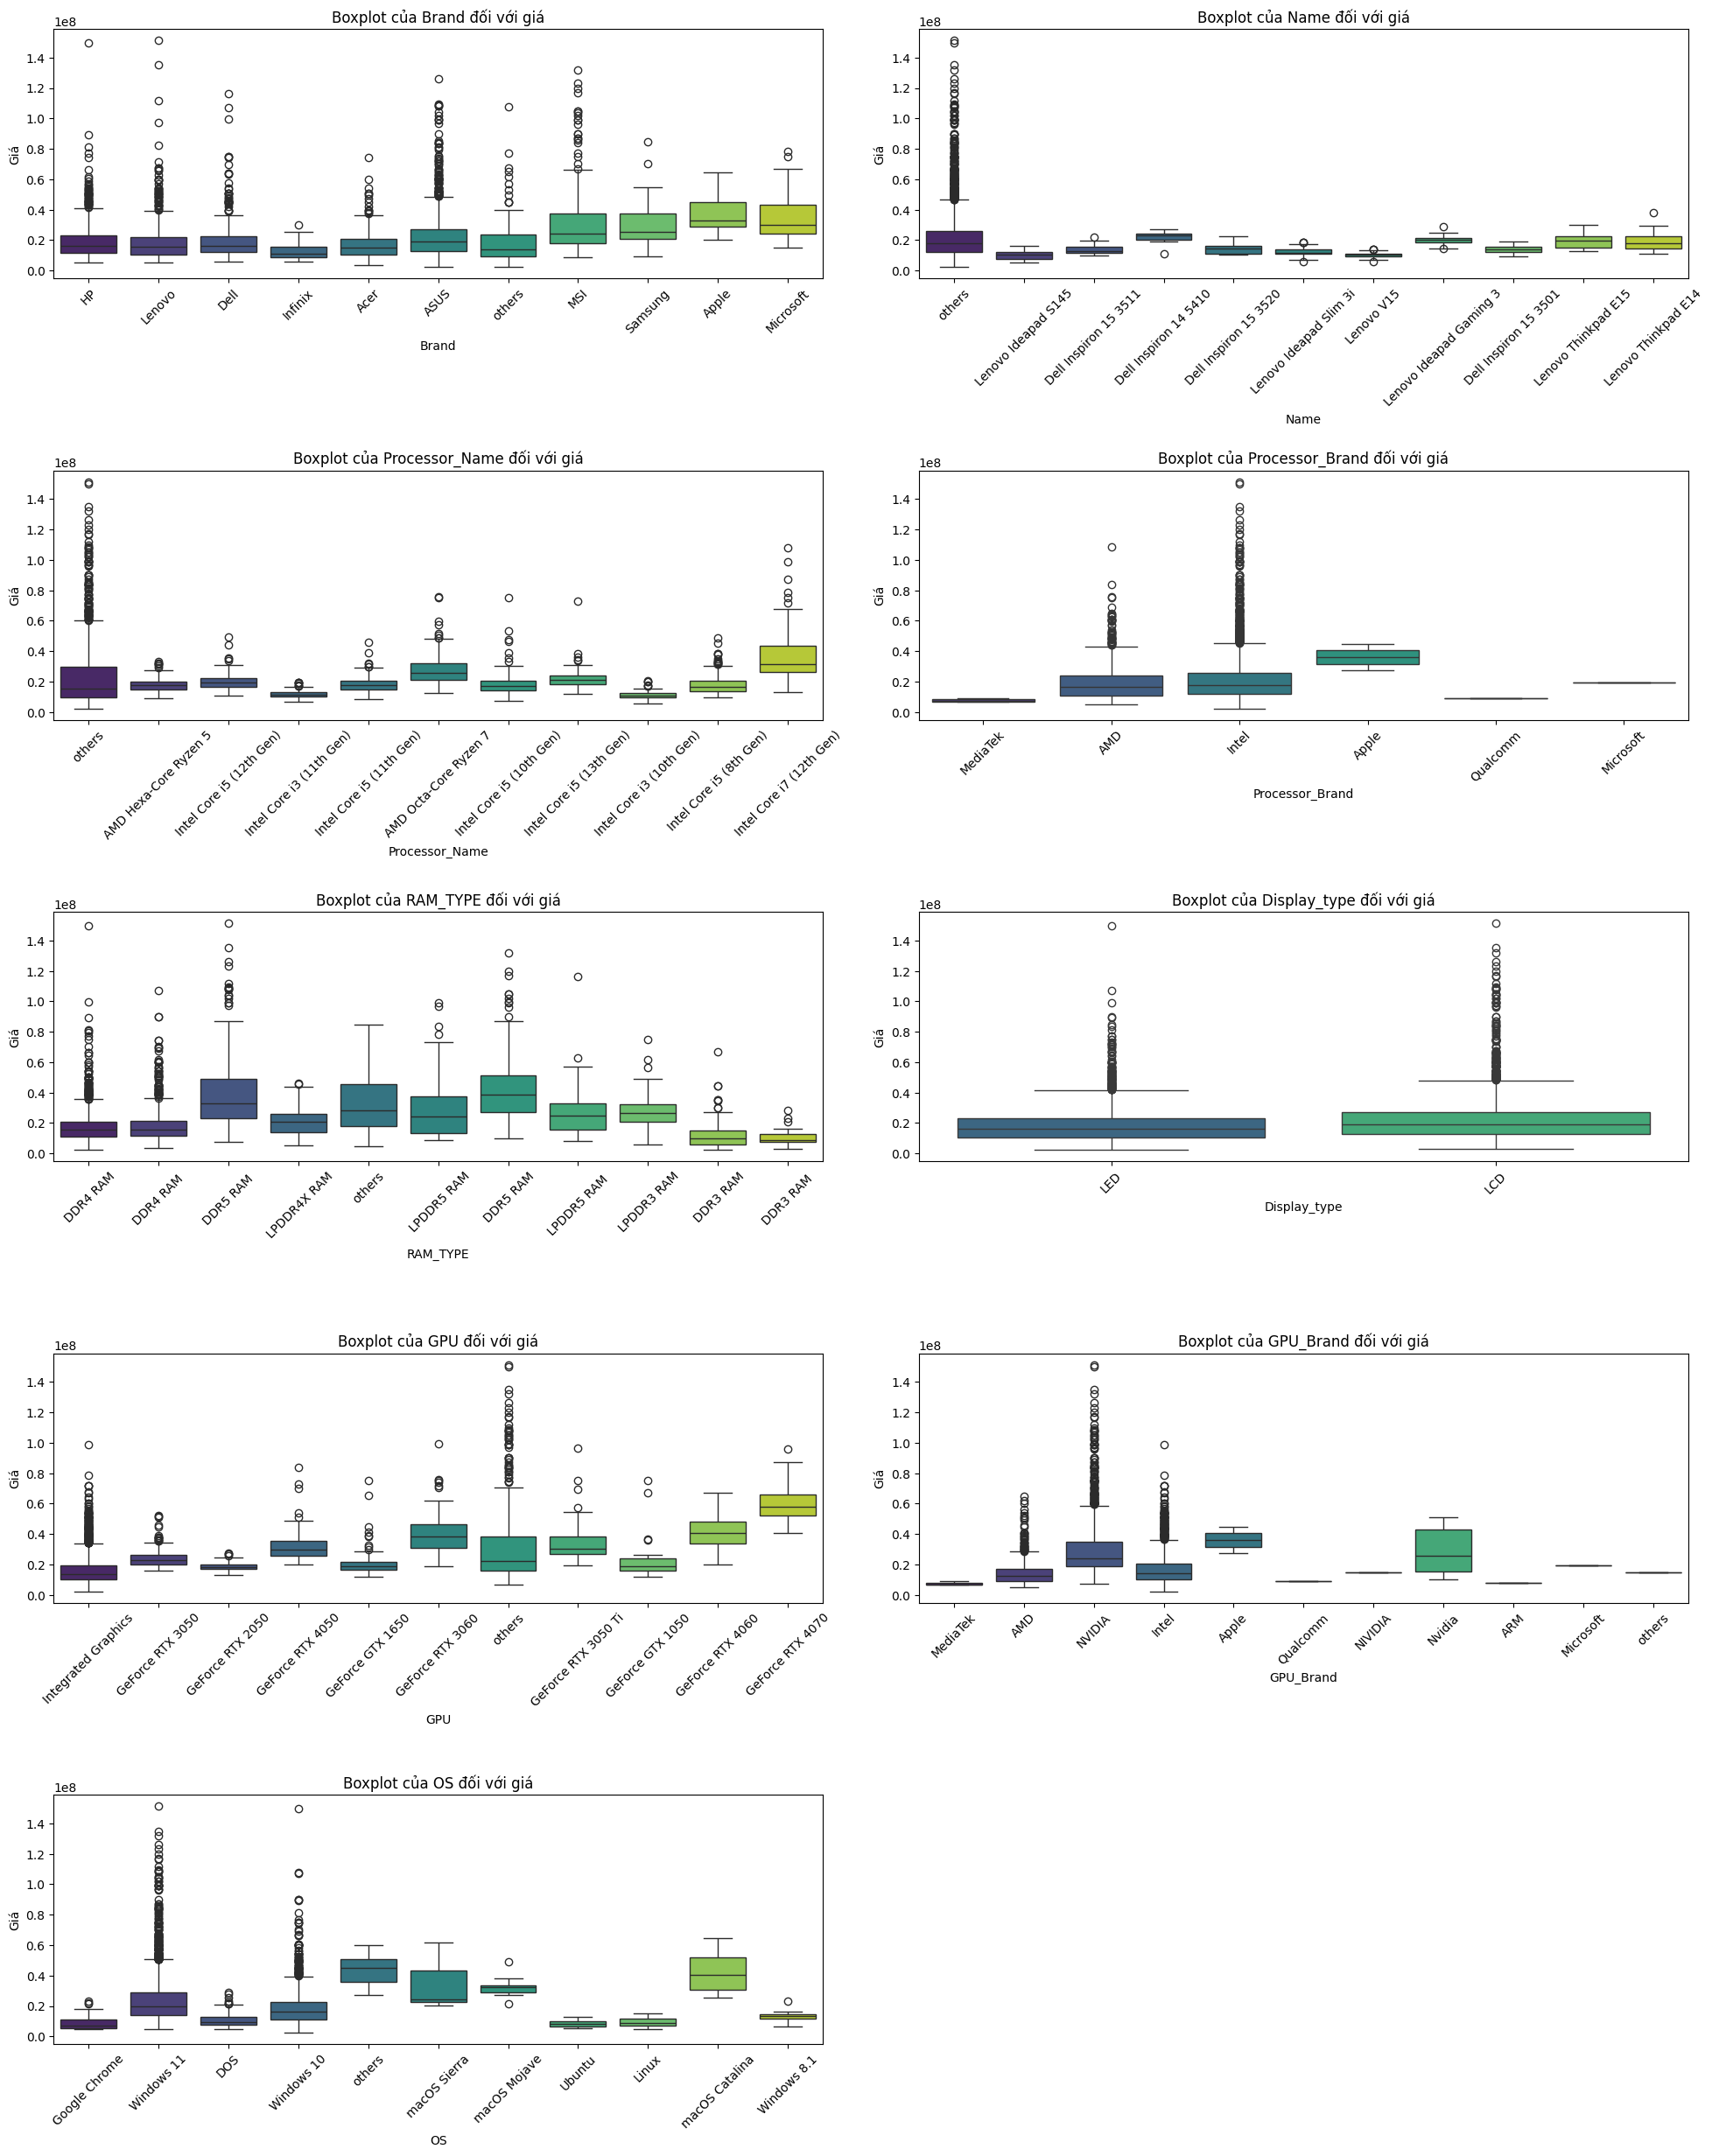

In [73]:
# Vẽ biểu đồ boxplot để thể hiện phân phối của giá bán theo nhóm các biến phân loại
df_countplot = df.copy()

plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)  # Tạo lưới 5x2
    
    # Nếu cột có quá nhiều loại, chỉ lấy top 10 loại xuất hiện nhiều nhất
    top_n = 10
    top_categories = df_countplot[col].value_counts().head(top_n).index
    
    # Thay các giá trị không thuộc top_n bằng 'others'
    df_countplot[col] = df_countplot[col].apply(lambda x: x if x in top_categories else 'others')
    
    # Vẽ boxplot
    sns.boxplot(x=col, y='Price_VND', data=df_countplot, hue=col, palette="viridis", legend=False)
    plt.title(f'Boxplot của {col} đối với giá', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Giá', fontsize=10)
    plt.xticks(rotation=45, fontsize=10)  # Xoay nhãn trục x để dễ đọc

# Tự động căn chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout(pad=2.0)
plt.show()

Dựa trên các biểu đồ boxplot trong ảnh, ta có thể rút ra các nhận xét về ảnh hưởng của từng biến tới giá bán laptop như sau:

1. Brand (Thương hiệu)
- **Nhận xét:**
  - Một số thương hiệu như **Apple** có giá trung bình cao hơn đáng kể so với các thương hiệu khác.
  - Các thương hiệu như Dell, Lenovo, Asus có mức giá trung bình thấp hơn và phân tán hơn.
- **Kết luận:** Thương hiệu là yếu tố quan trọng ảnh hưởng đến giá bán laptop.

2. Processor_Name (Tên bộ xử lý)
- **Nhận xét:**
  - Các dòng chip cao cấp như **Intel Core i9**, **AMD Ryzen 9** có mức giá cao hơn.
  - Các dòng chip phổ thông như **Intel Core i3**, **AMD Ryzen 3** có giá thấp hơn đáng kể.
- **Kết luận:** Processor_Name có ảnh hưởng mạnh đến giá bán.

3. Processor_Brand (Thương hiệu bộ xử lý)
- **Nhận xét:**
  - **Apple** có mức giá vượt trội so với các thương hiệu khác như Intel hay AMD.
- **Kết luận:** Processor_Brand là yếu tố quan trọng ảnh hưởng đến giá.

4. RAM_TYPE (Loại RAM)
- **Nhận xét:**
  - RAM DDR4 có giá trung bình thấp hơn các loại RAM cao cấp như LPDDR4X hoặc DDR5.
- **Kết luận:** Loại RAM có ảnh hưởng vừa phải tới giá bán laptop.

5. Display_Type (Loại màn hình)
- **Nhận xét:**
  - Laptop sử dụng màn hình LED thường có giá cao hơn so với màn hình LCD.
- **Kết luận:** Loại màn hình có tác động nhất định đến giá nhưng không phải yếu tố chính.

6. GPU (Card đồ họa)
- **Nhận xét:**
  - Các dòng GPU cao cấp như **NVIDIA GeForce RTX 4090** có mức giá cao hơn đáng kể so với các dòng tích hợp như **Intel UHD Graphics**.
- **Kết luận:** GPU là yếu tố quan trọng, đặc biệt với các laptop dành cho đồ họa hoặc gaming.

7. GPU_Brand (Thương hiệu GPU)
- **Nhận xét:**
  - Các thương hiệu như **NVIDIA** có mức giá trung bình cao hơn so với các thương hiệu khác như **Intel** hay **AMD**.
- **Kết luận:** GPU_Brand cũng là một yếu tố ảnh hưởng mạnh đến giá.

8. OS (Hệ điều hành)
- **Nhận xét:**
  - Laptop chạy **macOS** hoặc **Windows Pro** thường có giá cao hơn các hệ điều hành khác như Linux hoặc FreeDOS.
- **Kết luận:** OS có ảnh hưởng đến giá nhưng liên quan đến thương hiệu.

Tổng kết
Các biến ảnh hưởng mạnh đến giá bán laptop:
- **Thương hiệu (Brand)**
- **Tên bộ xử lý (Processor_Name)**
- **Thương hiệu GPU (GPU_Brand)**
- **Dòng GPU (GPU)**

Các biến ảnh hưởng vừa phải:
- **Loại RAM (RAM_TYPE)**
- **Loại màn hình (Display_Type)**
- **Hệ điều hành (OS)**

Sử dụng kiểm định F-test để đánh giá khả năng ảnh hưởng đến giá xe của các biến phân loại

- F-test càng lớn cho ta biết có sự khác biệt giữa số lượng giữa các biến phân loại, tức là có sự chênh lệch càng lớn giữa số lượng các nhãn có trong biến phân loại đó và p-value sẽ cho ta biết giá trị F-test có ý nghĩa hay không.

In [74]:
def find_most_influential_categorical_variable(df, category_columns, target_column):
    """
    Tìm biến phân loại ảnh hưởng nhiều nhất đến giá laptop bằng F-test và p-value.

    Parameters:
    - df: DataFrame, dữ liệu.
    - category_columns: list, danh sách tên các cột biến phân loại.
    - target_column: str, tên cột biến mục tiêu (giá laptop).

    Returns:
    - DataFrame, thông tin về biến phân loại ảnh hưởng nhiều nhất (tên, F-statistic, p-value).
    """
    results = []

    # Tạo bảng sao chép của DataFrame
    df_copy = df.copy()

    # Thay thế khoảng trắng bằng dấu _ trong tên các cột
    df_copy.columns = df_copy.columns.str.replace(' ', '_')

    for category_column in category_columns:
        formula = f"{target_column} ~ {category_column.replace(' ', '_')}"
        model = ols(formula, data=df_copy).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        # f_statistic = anova_table['F'][0]
        # p_value = anova_table['PR(>F)'][0]
        f_statistic = anova_table['F'].iloc[0]
        p_value = anova_table['PR(>F)'].iloc[0]


        results.append({'Tên biến': category_column, 'F-statistic': f_statistic,
                       'p-value': p_value, 'Có ý nghĩa?': True if p_value < 0.05 else False})

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(
        by=['F-statistic', 'p-value'], ascending=[False, True]).reset_index(drop=True)

    return result_df

In [75]:
# Bảng giá trị đánh giá độ ảnh hưởng của các biến phân loại đến giá bán laptop.
find_most_influential_categorical_variable(df, categorical_columns, target_column=target)

,Tên biến,F-statistic,p-value,Có ý nghĩa?
0,GPU_Brand,94.838765,3.882050e-176,True
1,RAM_TYPE,92.371508,1.975029e-257,True
2,Display_type,88.549964,8.209361e-21,True
3,Processor_Name,70.270548,0.000000e+00,True
4,GPU,54.741808,0.000000e+00,True
5,OS,27.909105,1.275768e-61,True
6,Brand,15.019387,6.449073e-72,True
7,Name,11.474093,7.300314e-320,True
8,Processor_Brand,5.949172,1.732426e-05,True


Đánh giá kết quả kiểm định F-test

1. Biến có ảnh hưởng mạnh nhất
- **`GPU_Brand`** có **F-statistic** cao nhất (**94.838765**) và **p-value** rất nhỏ (**3.882050e-176**). 
- Điều này cho thấy **GPU_Brand** có ảnh hưởng mạnh nhất đến giá laptop (biến mục tiêu) và có ý nghĩa thống kê (**p-value < 0.05**).

2. Các biến khác có ảnh hưởng lớn
- **`RAM_TYPE`**: F-statistic = **92.371508**, p-value = **1.975029e-257**. 
- **`Display_type`**: F-statistic = **88.549964**, p-value = **8.209361e-21**.
- **`Processor_Name`** và **`GPU`**: F-statistic lớn (**70.270548** và **54.741808**) và **p-value** bằng 0, cho thấy tầm quan trọng đáng kể.

3. Biến có ảnh hưởng yếu hơn
- **`Processor_Brand`**: F-statistic nhỏ nhất (**5.949172**) nhưng vẫn có ý nghĩa thống kê vì **p-value = 1.732426e-05** (< 0.05).
- Mức độ ảnh hưởng của biến này thấp hơn so với các biến khác.

4. Nhận xét tổng quan
- Tất cả các biến đều có ý nghĩa thống kê (**p-value < 0.05**) và ảnh hưởng đến biến mục tiêu (**giá laptop**).
- Các biến liên quan đến cấu hình phần cứng (**GPU_Brand, RAM_TYPE, Display_type, Processor_Name**) có ảnh hưởng lớn hơn các biến liên quan đến thương hiệu hoặc tên sản phẩm (**Brand, Processor_Brand, Name**).
- Điều này hợp lý vì giá laptop hoặc máy tính thường bị ảnh hưởng nhiều bởi cấu hình phần cứng.

Đánh giá
- **GPU_Brand** là biến có ảnh hưởng mạnh nhất đến giá laptop.
- Các biến khác như **RAM_TYPE**, **Display_type**, **Processor_Name**, và **GPU** cũng có vai trò quan trọng.
- Bạn nên dựa trên kết quả này để tối ưu hóa mô hình của mình, đảm bảo đạt được kết quả dự đoán tốt nhất.


Đánh giá thêm về mức độ quan trọng của 2 biến các biến liên quan tới thương hiệu như Brand và Processor_Brand

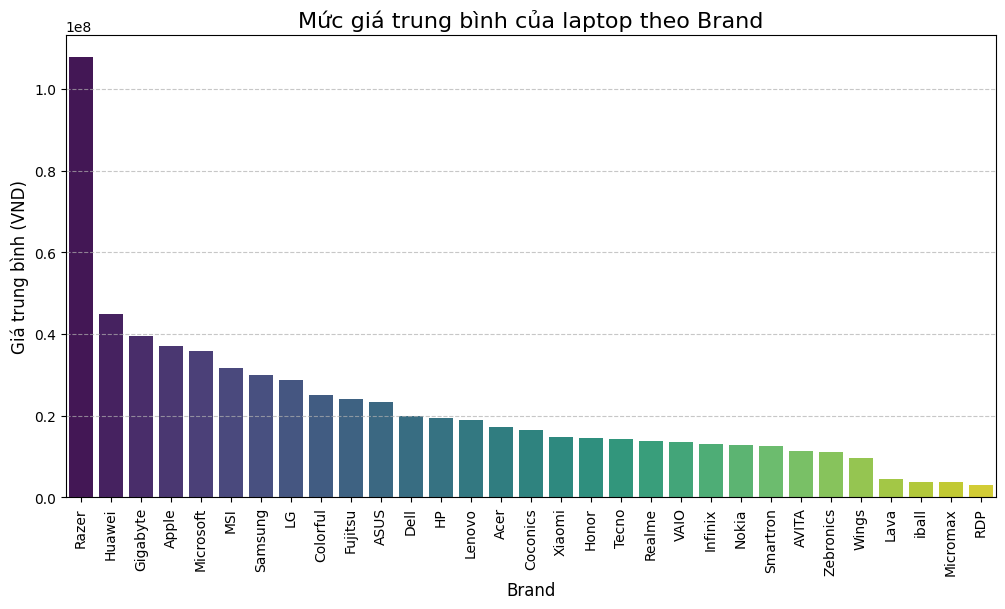

In [76]:
# Vẽ biểu đồ thể hiện mức giá trung bình của laptop theo Brand
# Tính giá trung bình theo từng brand
avg_price_by_brand = df.groupby('Brand')['Price_VND'].mean().sort_values(ascending=False).reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Price_VND', data=avg_price_by_brand, hue='Brand', palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Mức giá trung bình của laptop theo Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Giá trung bình (VND)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

Đánh giá:
- Mức giá cao nhất:
    - Razer đứng đầu trong bảng xếp hạng, với giá trung bình vượt trội so với các thương hiệu khác. Điều này phản ánh rằng laptop Razer thường có mức giá cao, có thể do tính năng cao cấp hoặc đối tượng khách hàng đặc thù (ví dụ, game thủ cao cấp).
- Mức giá trung bình ổn định:
    - Các thương hiệu như Huawei, Gigabyte, Apple, và Microsoft có mức giá trung bình cao, nhưng không đạt tới mức cao như Razer. Những thương hiệu này có thể được biết đến với các dòng laptop có hiệu suất tốt, thiết kế hiện đại, và các tính năng phù hợp với người dùng chuyên nghiệp.
- Mức giá thấp hơn:
    - Các thương hiệu như Acer, Cocoonics, Xiaomi, và Micromax có mức giá trung bình thấp hơn nhiều so với các thương hiệu ở trên. Đây có thể là những thương hiệu cung cấp laptop giá rẻ hoặc tập trung vào các thị trường giá trị thấp hơn.
- Xu hướng giá:
    - Có sự phân chia rõ rệt giữa các thương hiệu giá cao (ví dụ: Razer, Huawei) và các thương hiệu giá thấp (ví dụ: Micromax, RDP). Điều này cho thấy một sự phân hóa rõ ràng về chiến lược định giá trong ngành laptop, nơi các thương hiệu hàng đầu cung cấp các sản phẩm cao cấp trong khi các thương hiệu khác tập trung vào thị trường giá rẻ.

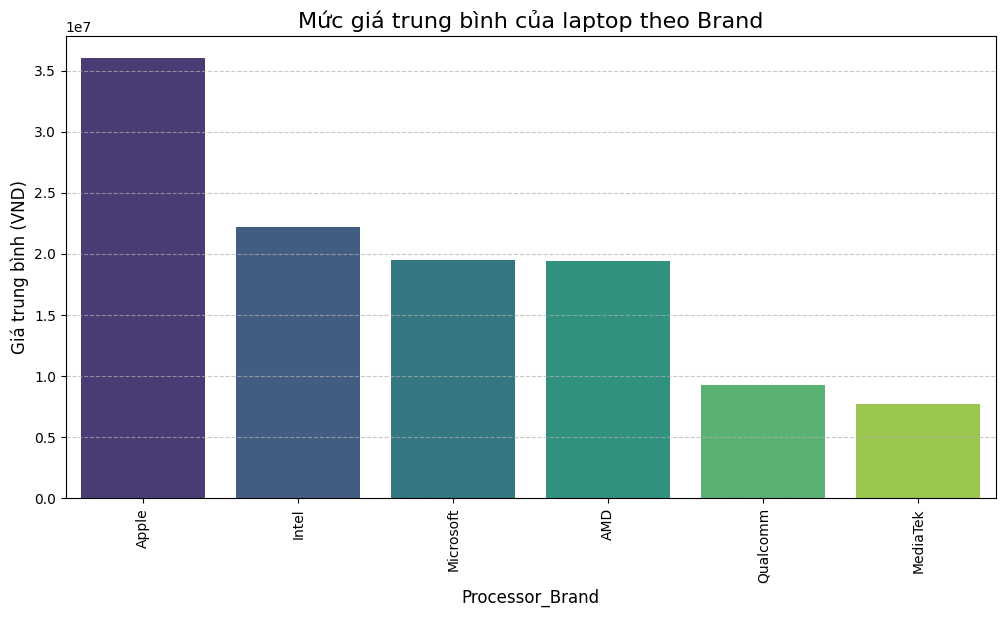

In [77]:
# Vẽ biểu đồ thể hiện mức giá trung bình của laptop theo Processor_Brand
# Tính giá trung bình theo từng Processor_Brand
avg_price_by_brand = df.groupby('Processor_Brand')['Price_VND'].mean().sort_values(ascending=False).reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='Processor_Brand', y='Price_VND', data=avg_price_by_brand, hue='Processor_Brand', palette='viridis')

# Thêm tiêu đề và nhãn
plt.title('Mức giá trung bình của laptop theo Brand', fontsize=16)
plt.xlabel('Processor_Brand', fontsize=12)
plt.ylabel('Giá trung bình (VND)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

Biểu đồ này thể hiện mức giá trung bình của các laptop theo từng thương hiệu bộ xử lý (Processor Brand). Dưới đây là một số đánh giá:

1. Mức giá cao nhất:
Apple đứng đầu bảng với mức giá trung bình vượt trội, lên tới khoảng 3.5 triệu VND. Điều này cho thấy các sản phẩm của Apple (chắc chắn bao gồm các dòng MacBook) có giá khá cao, có thể là do sự kết hợp của thiết kế tinh tế, hệ sinh thái Apple và các tính năng đặc biệt.
2. Mức giá trung bình:
Các thương hiệu bộ xử lý như Intel và Microsoft cũng có mức giá trung bình cao nhưng thấp hơn Apple. Điều này có thể phản ánh rằng các laptop sử dụng bộ xử lý Intel và Microsoft (có thể là các dòng Surface) cũng nhắm tới đối tượng khách hàng cao cấp hoặc chuyên nghiệp, nhưng mức giá chưa đạt được mức cao như các dòng của Apple.
3. Mức giá thấp hơn:
Các thương hiệu như AMD, Qualcomm, và MediaTek có mức giá trung bình thấp hơn nhiều so với Apple và Intel. Điều này có thể phản ánh rằng các laptop sử dụng các bộ xử lý này có xu hướng tập trung vào phân khúc giá rẻ, có thể là laptop văn phòng hoặc laptop giá trị thấp, không hướng tới thị trường cao cấp.
4. Xu hướng giá:
Biểu đồ cho thấy có sự phân hóa rõ rệt giữa các bộ xử lý cao cấp và thấp cấp. Apple dẫn đầu với mức giá cao, trong khi các thương hiệu khác như AMD, Qualcomm và MediaTek có mức giá thấp hơn. Điều này có thể cho thấy các chiến lược định giá khác nhau của các thương hiệu dựa trên loại khách hàng mục tiêu và hiệu suất của các bộ xử lý.

#### Lựa chọn đặc trưng

Dựa theo các phân tích trước đó, ta có thể kết luận một số biến có ảnh hưởng tới giá bán laptop, có thể áp dụng vào mô hình dự đoán như sau:
- Biến số: RAM, SSD, VRAM
- Biến phân loại: Brand, Processor_Name, Processor_Brand, RAM_TYPE, Display_type, GPU, GPU_Brand, OS

In [78]:
# Loại bỏ cột Name và Price_Category ra khỏi bộ dữ liệu
df = df.drop(columns=['Name', 'Price_Category'], axis=1)

# lưu lại bộ dữ liệu
df.to_csv('../Data/input_data.csv', index=False)